# Analyse user behaviour & optimise the user workflow using a machine learning algorithm

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df=pd.read_csv("Kitaab_MohammedSaket_data.csv")

In [16]:
df.head()

,Users,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,User 1,A1,A2,A3,A2,A2,A1,A3,A4,A4,...,A8,A5,A5,A5,A5,A5,A5,NaN,NaN,NaN
1,User 2,A1,A1,A1,A1,A1,A1,A3,A9,A1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,User 3,A1,A1,A1,A3,A10,A10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,User 4,A1,A1,A3,A11,A11,A5,A6,A5,A11,...,A10,A5,A6,A1,NaN,NaN,NaN,NaN,NaN,NaN
4,User 5,A1,A1,A1,A3,A13,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.set_index(df.columns[0],inplace=True)

In [18]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,29
Users,,,,,,,,,,,,,,,,,,,,,
User 1,A1,A2,A3,A2,A2,A1,A3,A4,A4,A5,...,A8,A5,A5,A5,A5,A5,A5,NaN,NaN,NaN
User 2,A1,A1,A1,A1,A1,A1,A3,A9,A1,A1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
User 3,A1,A1,A1,A3,A10,A10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
User 4,A1,A1,A3,A11,A11,A5,A6,A5,A11,A11,...,A10,A5,A6,A1,NaN,NaN,NaN,NaN,NaN,NaN
User 5,A1,A1,A1,A3,A13,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
data=[]
for i in range(100):
    x=df.values[i]
    x=x[~pd.isnull(x)]
    data.append(x)
data

[array(['A1', 'A2', 'A3', 'A2', 'A2', 'A1', 'A3', 'A4', 'A4', 'A5', 'A6',
        'A6', 'A6', 'A6', 'A6', 'A2', 'A3', 'A7', 'A8', 'A8', 'A5', 'A5',
        'A5', 'A5', 'A5', 'A5'], dtype=object),
 array(['A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A3', 'A9', 'A1', 'A1', 'A1',
        'A1', 'A1', 'A1', 'A1', 'A1'], dtype=object),
 array(['A1', 'A1', 'A1', 'A3', 'A10', 'A10'], dtype=object),
 array(['A1', 'A1', 'A3', 'A11', 'A11', 'A5', 'A6', 'A5', 'A11', 'A11',
        'A3', 'A1', 'A3', 'A12', 'A3', 'A1', 'A1', 'A3', 'A10', 'A10',
        'A5', 'A6', 'A1'], dtype=object),
 array(['A1', 'A1', 'A1', 'A3', 'A13'], dtype=object),
 array(['A1', 'A1', 'A1', 'A1', 'A1', 'A3', 'A1', 'A3', 'A14', 'A14', 'A5',
        'A6', 'A5', 'A1'], dtype=object),
 array(['A1', 'A1', 'A13', 'A13', 'A5', 'A5'], dtype=object),
 array(['A1', 'A3', 'A15', 'A16', 'A16', 'A5', 'A5', 'A5'], dtype=object),
 array(['A1', 'A1'], dtype=object),
 array(['A1', 'A13', 'A13', 'A5', 'A5', 'A5', 'A5'], dtype=object),
 array(['A1', '

In [20]:
from markovclick.models import MarkovClickstream
m = MarkovClickstream(data)

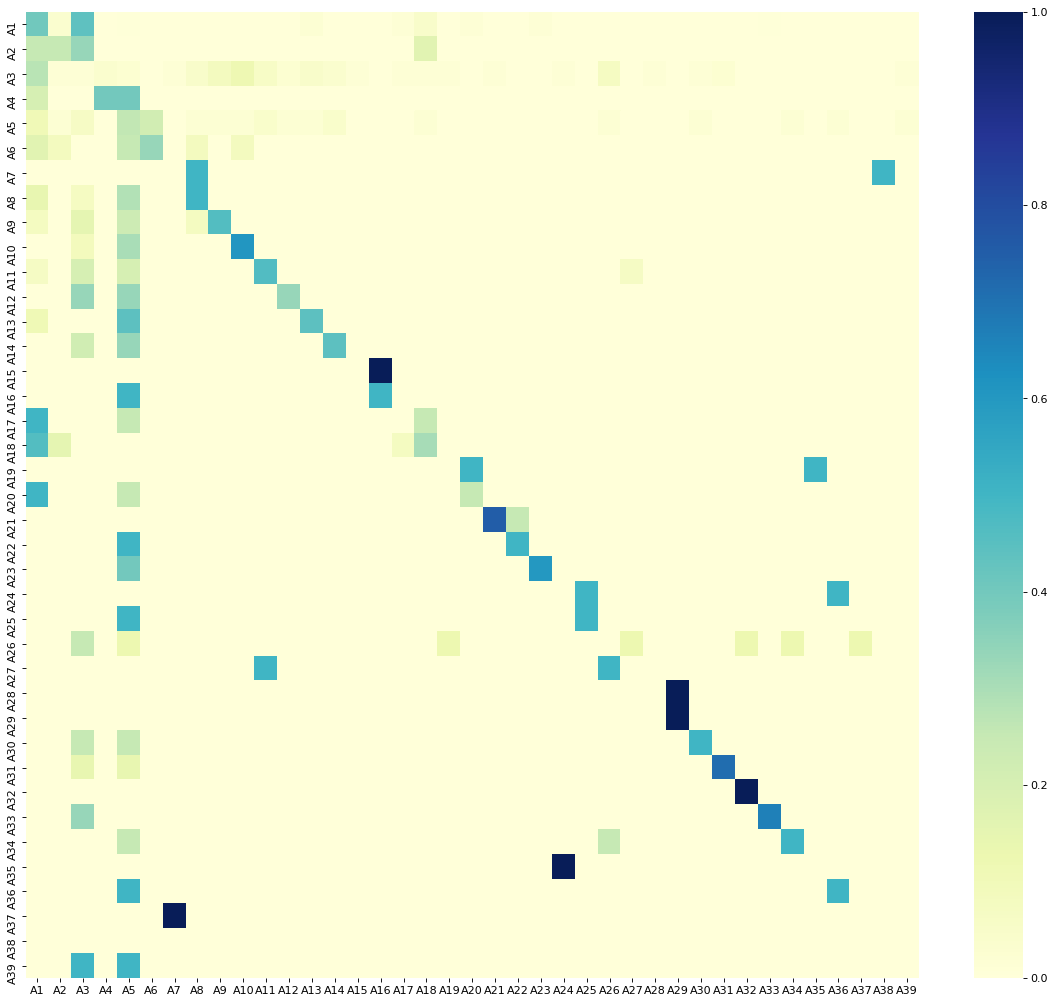

In [21]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
sns.heatmap(m.prob_matrix, xticklabels=m.pages, yticklabels=m.pages,cmap="YlGnBu")

In [22]:
    from markovclick.viz import visualise_markov_chain
    graph = visualise_markov_chain(m)

In [23]:
print(graph.source)  

digraph {
	A1 [label=A1 fillcolor="#76ff03" fontcolor="#1a237e" fontname=Helvetica penwidth=0 style=filled]
	A1 -> A3 [label=0.44 arrowsize=0.75 color="#90caf9" fontname=Helvetica penwidth=1.5]
	A1 -> A1 [label="   0.40" arrowsize=0.5 color="#90caf9" fontname=Helvetica fontsize=10 penwidth=0.75]
	A2 [label=A2 fillcolor="#76ff03" fontcolor="#1a237e" fontname=Helvetica penwidth=0 style=filled]
	A2 -> A3 [label=0.33 arrowsize=0.75 color="#90caf9" fontname=Helvetica penwidth=1.5]
	A2 -> A1 [label="   0.25" arrowsize=0.5 color="#90caf9" fontname=Helvetica fontsize=10 penwidth=0.75]
	A2 -> A2 [label="   0.25" arrowsize=0.5 color="#cfd8dc" fontname=Helvetica fontsize=10 penwidth=1.8]
	A3 [label=A3 fillcolor="#76ff03" fontcolor="#1a237e" fontname=Helvetica penwidth=0 style=filled]
	A3 -> A1 [label=0.28 arrowsize=0.75 color="#90caf9" fontname=Helvetica penwidth=1.5]
	A3 -> A10 [label="   0.12" arrowsize=0.5 color="#90caf9" fontname=Helvetica fontsize=10 penwidth=0.75]
	A3 -> A3 [label="   0.01"

}


In [24]:
graph.render('test-output/round-table.gv', view=True)

'test-output/round-table.gv.pdf'

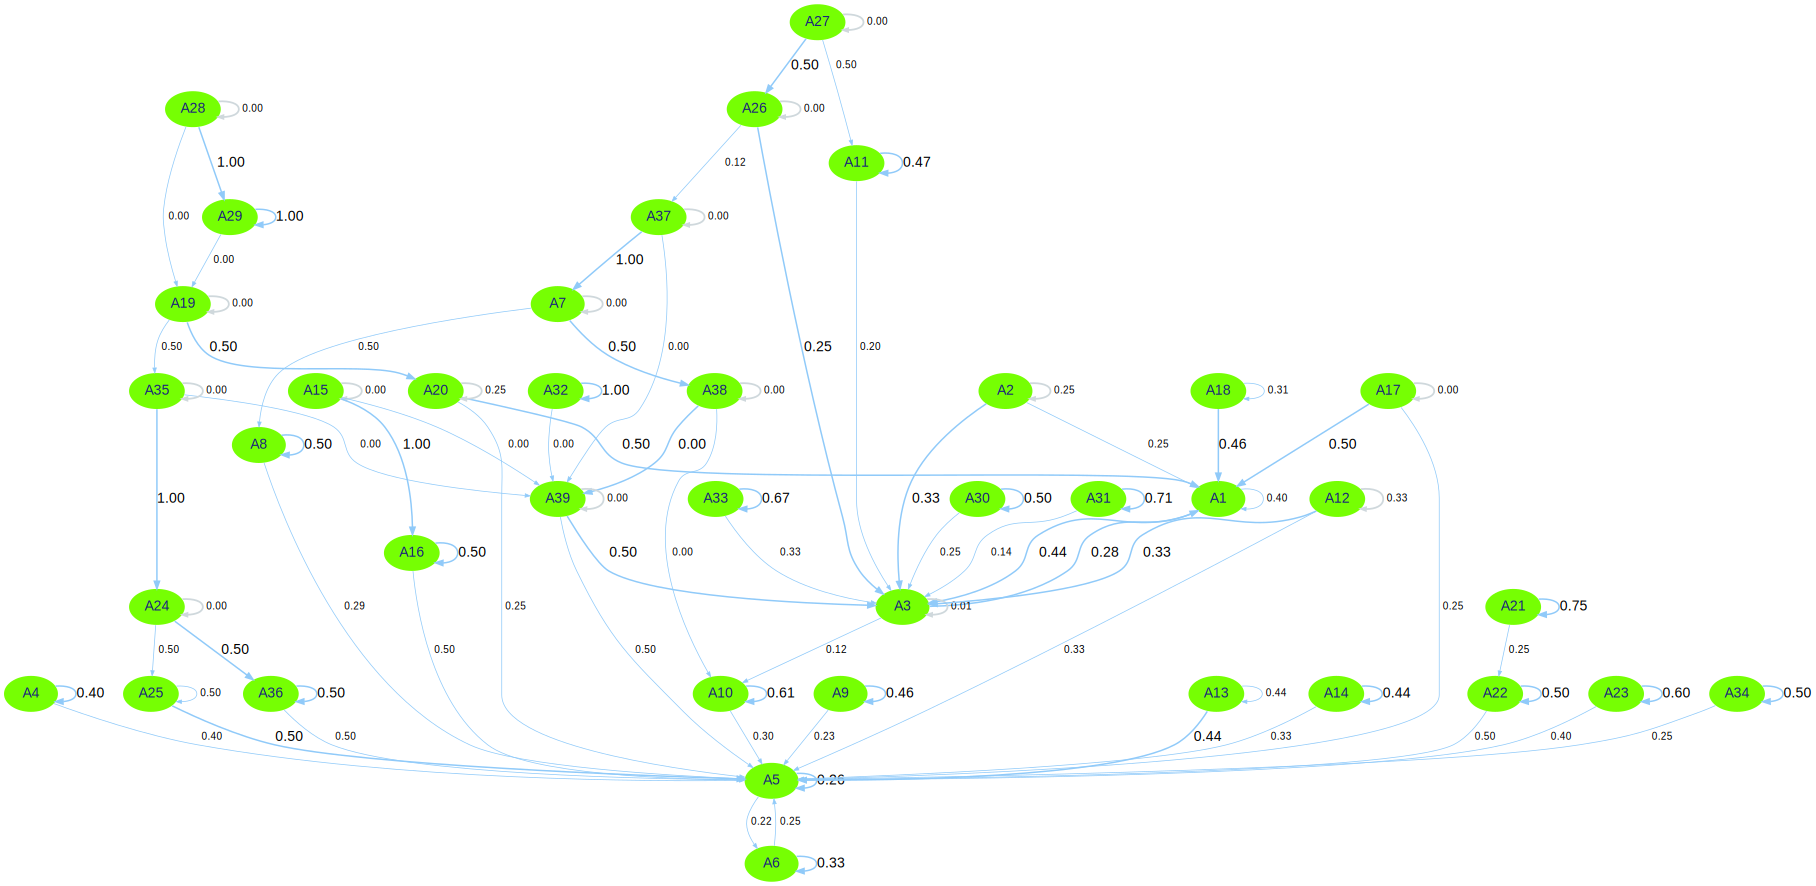

In [25]:

graph
